# XYZ Bank Customer Churn Analysis and Prediction

In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np

# Matplotlib for visualizing data
from matplotlib import pyplot as plt

# Displaying plots within the Jupyter notebook
%matplotlib inline

# Seaborn for improved data visualization
import seaborn as sns
sns.set_style('darkgrid')

# Counter for tallying occurrences of elements in a collection
from collections import Counter

# Exploratory Data Analysis

### Reading the CSV and Performing Data Cleaning

In [3]:
# Loading the dataset
df = pd.read_csv("dataset.csv")

# Displaying the dimensions of the dataframe
print(f"Dataframe dimensions: {df.shape}")

# Displaying the first few rows of the dataframe
df.head()

Dataframe dimensions: (10000, 14)


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    Sweden  Female   42   
1          2    15647311      Hill          608   Denmark  Female   41   
2          3    15619304      Onio          502    Sweden  Female   42   
3          4    15701354      Boni          699    Sweden  Female   39   
4          5    15737888  Mitchell          850   Denmark  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
# Displaying information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no "nulls" in our dataframe.

In [5]:
# Listing number of unique customer IDs
df.CustomerId.nunique()

10000

All Custuomer IDs are unique which means there are no duplicates.

In [6]:
df.duplicated().sum()

0

#### Removing Unnecessary features

To make dataset easily readable we will drop features not needed for prediction:

* RowNumber
* CustomerId
* Surname

In [7]:
# Drop unused features
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 11)


CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    Sweden  Female   42       2       0.00              1   
1          608   Denmark  Female   41       1   83807.86              1   
2          502    Sweden  Female   42       8  159660.80              3   
3          699    Sweden  Female   39       1       0.00              2   
4          850   Denmark  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

# Univariate Analysis

### Distributions of Features (Numerical and Categorical)

#### Customers by Churn Percentage

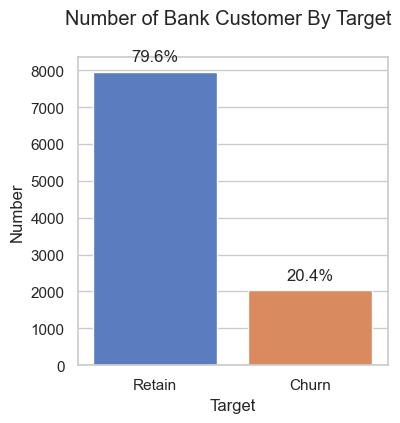

In [8]:
"""
Parameters:
    data (DataFrame): The input data.
    chart (str): The title of the countplot.
"""

def plot_countplot_by_target(data, chart):
    """
    Plot a countplot based on the target variable.

    Args:
        data (DataFrame): The input data.
        chart (str): The title of the countplot.
    """
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(4, 4))
    plt.suptitle(f'{chart}', y=1)

    # Plotting countplot based on the target variable
    g = sns.countplot(x='Exited', data=data, palette='muted')
    g.set(ylabel='Number', xlabel='Target')

    # Customize xticks
    plt.xticks([0, 1], ['Retain', 'Churn'], fontsize=11)

    # Annotate the percentage on the chart
    total = len(data['Exited'])
    for p in g.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 200), \
                   ha='center', va='bottom', fontsize=12)

    plt.show()

plot_countplot_by_target(df, 'Number of Bank Customer By Target')

The chart depicted above illustrates the distribution of the target variable, indicating that the percentage of Churn among bank customers is 20.4%. This suggests an imbalance in the data related to the target variable.

#### Plotting Histogram grid

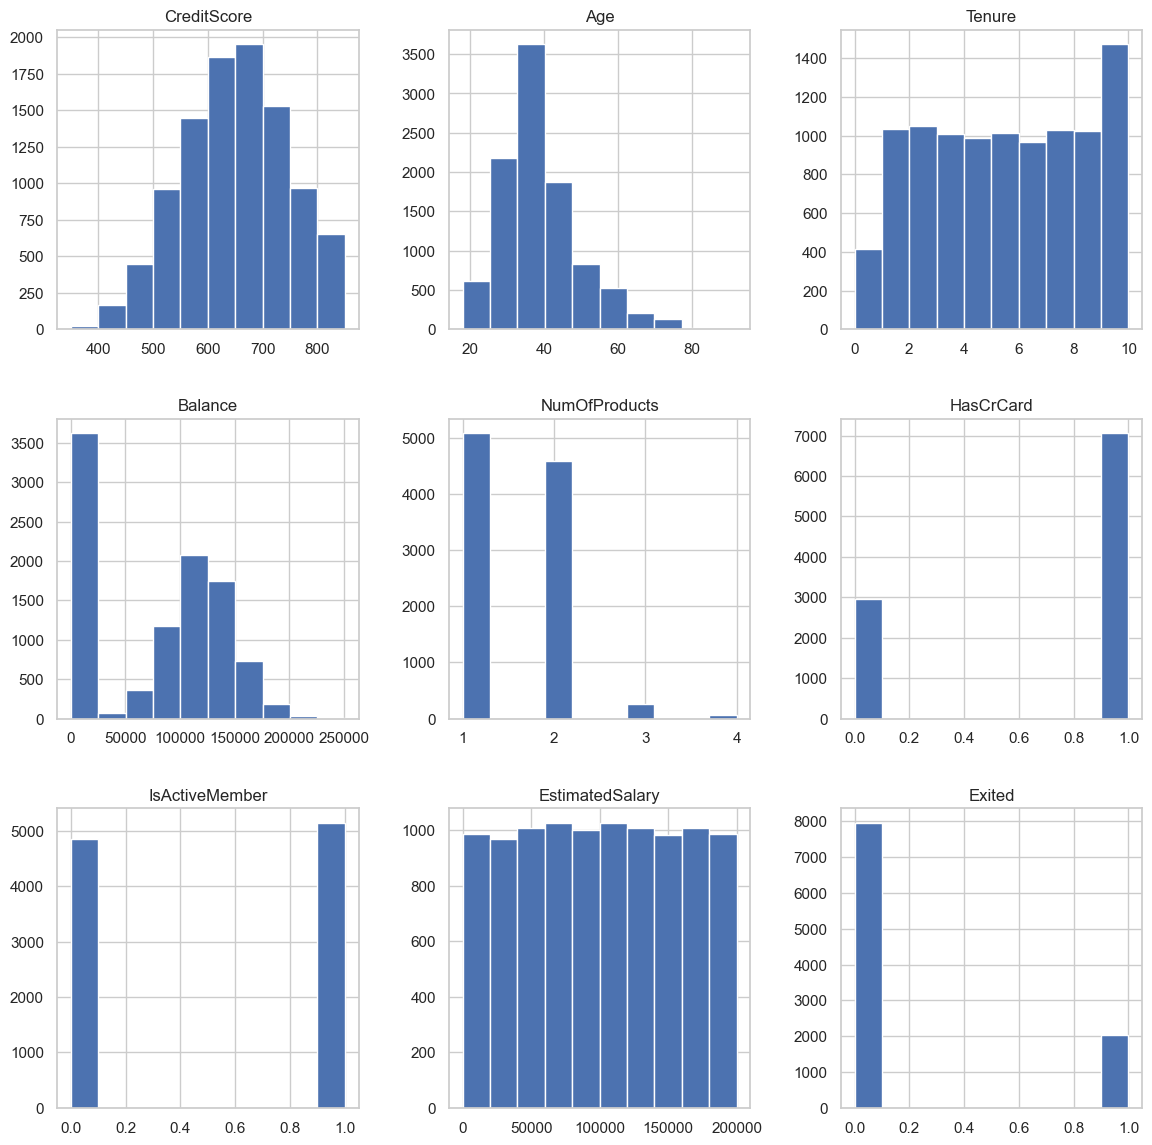

In [9]:
# Plotting histogram grid
df.hist(figsize=(14,14))
plt.show()

#### Summary statistics for the numeric features

In [10]:
# Summarizing the numerical features
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

Based on the summary statistics and histograms, it can be inferred that all features appear to be within acceptable ranges. No extreme values are observed for any feature.

### Distribution of Categorical Features

In [11]:
# Summarizing categorical features
df.describe(include=['object'])

Geography Gender
count      10000  10000
unique         3      2
top       Sweden   Male
freq        5014   5457

This provides the count of unique classes for each feature. For instance, the count of males (5457) exceeds that of females. Additionally, Sweden is the most frequently occurring geography among the three (Sweden, Denmark, Finland) in our dataframe.

### Gender Distribution

In [12]:
"""
Parameters:
    data (DataFrame): The input data.
    feature (str): The variable for which the bar plot is created.
"""

def plot_bar_count(data, feature):
    """
    Create a bar plot for a specified feature.

    Args:
        data (DataFrame): The input data.
        feature (str): The variable for which the bar plot is created.
    """
    plt.figure(figsize=(4, 4))
    data[feature].value_counts().plot.bar(color=['blue', 'green'])
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=0)
    plt.show()

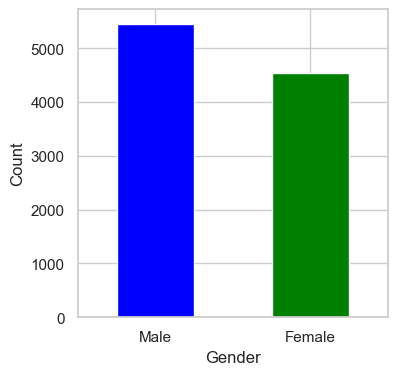

Counter({'Female': 4543, 'Male': 5457})

In [13]:
plot_bar_count(df, 'Gender')

# Display the count of each class in the specified feature
Counter(df['Gender'])

In our data sample there are more males than females.

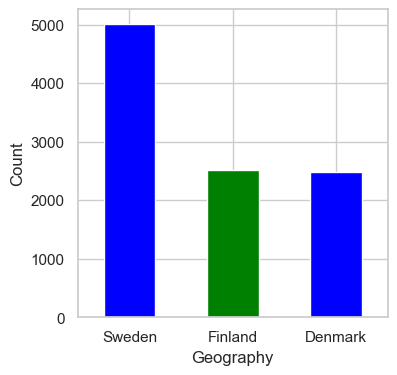

Counter({'Sweden': 5014, 'Denmark': 2477, 'Finland': 2509})

In [14]:
plot_bar_count(df, 'Geography')

# Display the count of each class in the specified feature
Counter(df['Geography'])

Majority of customers are from Sweden, about 50%, and from Denamrk and Finland around 25% each.

### Churn Segmentation analysis by Gender¶

In [15]:
def countplot_univariate(data, column, hue, label, max_sample, num_x_ticks, x_ticks, width, height, y_title, orient, title):
    """
    Plot a countplot for univariate analysis.

    Parameters:
        data (DataFrame): The input data.
        column (str): The variable to be plotted on the x-axis (or y-axis, based on the `orient` parameter).
        hue (str): The third variable to differentiate categories (optional).
        label (str): The label for the variable on the x-axis (or y-axis).
        max_sample (int): The maximum number of categories to be shown on the plot.
        num_x_ticks (int): The number of x-axis ticks to be customized.
        x_ticks (list): The list of x-axis tick labels to be customized.
        width (float): The width of the plot.
        height (float): The height of the plot.
        y_title (float): The distance between the title and the plot.
        orient (str): The orientation of the plot ('vertical' or 'horizontal').
        title (str): The title of the plot.
    """
    # Create a new figure with the specified width, height, and title
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # Determine the order of the categories based on the maximum sample size
    order = data[column].value_counts().nlargest(max_sample).index if max_sample > 0 else data[column].value_counts().index

    # Create a countplot based on the specified orientation
    if orient == 'vertical':
        g = sns.countplot(x=column, hue=hue, order=order, data=data, palette='deep')
        g.set(xlabel=label, ylabel='Number')
    elif orient == 'horizontal':
        g = sns.countplot(y=column, hue=hue, order=order, data=data, palette='deep')
        g.set(xlabel='Number', ylabel=label)

    plt.legend(title='Exited', labels=['Stay', 'Churn'], fontsize=11)

    # Customize the x-axis ticks if the number of ticks is specified
    if num_x_ticks > 0:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)

    # Calculate the total number of observations
    total = len(data[column])

    # Add percentage annotations to the bars
    for p in g.patches:
        if orient == 'vertical':
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + (p.get_width() + 0.05) / 2, height + 50), \
                            ha='center', va='bottom', fontsize=12)
        elif orient == 'horizontal':
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 25, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)
            
    plt.show()

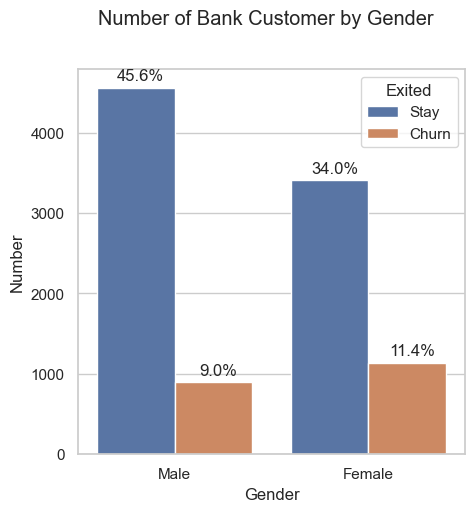

In [16]:
# applying the procedure to plot the chart
countplot_univariate(df, 'Gender', 'Exited', 'Gender', 0, 0, None, 5, 5, 1, \
                     'vertical', 'Number of Bank Customer by Gender')

The chart above illustrates the distribution of the target variable based on 'Gender.' Among bank customers, females exhibit the highest churn rate at 11.4%, surpassing males who have a churn rate of 9%.

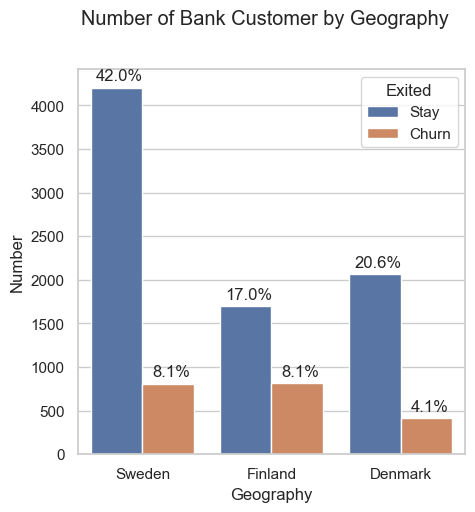

In [17]:
# applying the procedure to plot the chart
countplot_univariate(df, 'Geography', 'Exited', 'Geography', 0, 0, None, 5, 5, 1, \
                     'vertical', 'Number of Bank Customer by Geography')

The chart above displays the distribution of target variables categorized by geography. Specifically, both Sweden and Finland demonstrate a churn percentage of 8.1%, while Denmark exhibits a churn percentage of 4.1%.

### Churn Segmentation by Geography¶


The smallest number of customers are from Finland but it looks that they are most likely to leave the bank. Almost one third of Finnish customers in our sample left the bank.

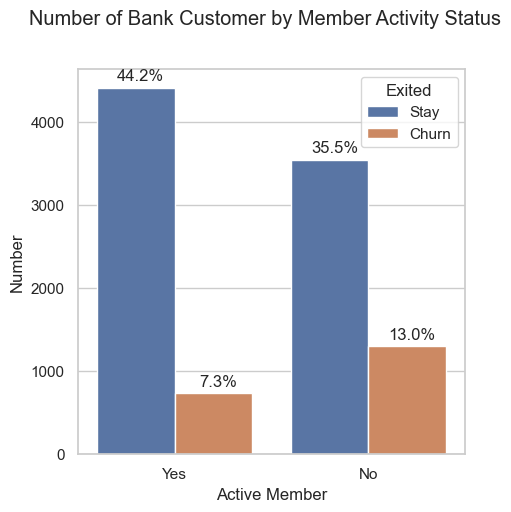

In [18]:
# applying the procedure to plot the chart
countplot_univariate(df, 'IsActiveMember', 'Exited', 'Active Member', 0, 2, ['Yes', 'No'], 5, 5, 1, \
                     'vertical', 'Number of Bank Customer by Member Activity Status')

The graph above depicts the distribution of the target variable based on 'IsActiveMember.' Notably, bank customers who are not active members exhibit a higher churn percentage, totaling 13%, compared to active customers.

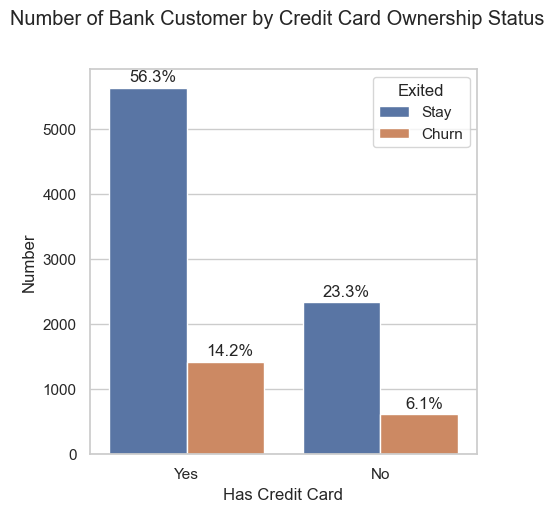

In [19]:
# applying the procedure to plot the chart
countplot_univariate(df, 'HasCrCard', 'Exited', 'Has Credit Card', 0, 2, ['Yes', 'No'], 5, 5, 1, \
                     'vertical', 'Number of Bank Customer by Credit Card Ownership Status')

The graph above illustrates the distribution of target variables categorized by 'HasCrCard.' Notably, bank customers possessing a credit card have the highest churn rate at 14.2%, exceeding customers without a credit card, who have a churn percentage of 6.1%.

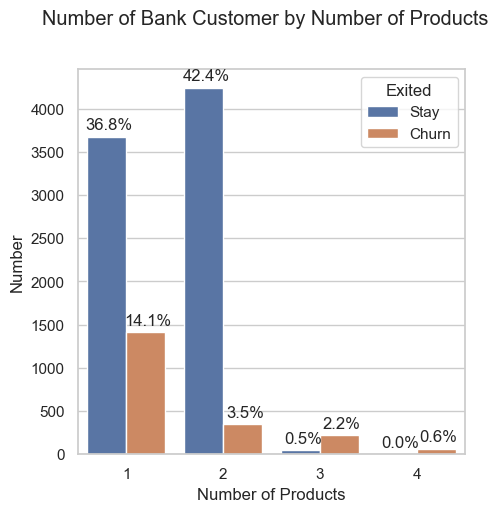

In [20]:
# applying the procedure to plot the chart
countplot_univariate(df, 'NumOfProducts', 'Exited', 'Number of Products', 0, 0, None, 5, 5, 1, \
                     'vertical', 'Number of Bank Customer by Number of Products')

The graph above displays the distribution of target variables based on 'HasCrCard.' Notably, bank customers who have made at least one purchase through the bank exhibit a higher churn percentage compared to other categories, standing at 14.1%.

## Bivariate Analysis

## Correlations

In [21]:
"""
Parameters:
    data (DataFrame): The input data.
    target_column (str): The target variable for which correlations are calculated.
"""

def calculate_correlations(data, target_column):
    """
    Calculate correlations between numeric features and sort them based on their correlation with the target variable.

    Args:
        data (DataFrame): The input data.
        target_column (str): The target variable for which correlations are calculated.
    
    Returns:
        DataFrame: A DataFrame containing sorted correlations.
    """
    correlations = data.corr()

    # Sort features in order of their correlation with the target variable
    sort_corr_cols = correlations[target_column].sort_values(ascending=False).keys()
    sort_corr = correlations.loc[sort_corr_cols, sort_corr_cols]

    return sort_corr


 
print(calculate_correlations(df, 'Exited'))

                   Exited       Age   Balance  EstimatedSalary  HasCrCard  \
Exited           1.000000  0.285323  0.118533         0.012097  -0.007138   
Age              0.285323  1.000000  0.028308        -0.007201  -0.011721   
Balance          0.118533  0.028308  1.000000         0.012797  -0.014858   
EstimatedSalary  0.012097 -0.007201  0.012797         1.000000  -0.009933   
HasCrCard       -0.007138 -0.011721 -0.014858        -0.009933   1.000000   
Tenure          -0.014001 -0.009997 -0.012254         0.007784   0.022583   
CreditScore     -0.027094 -0.003965  0.006268        -0.001384  -0.005458   
NumOfProducts   -0.047820 -0.030680 -0.304180         0.014204   0.003183   
IsActiveMember  -0.156128  0.085472 -0.010084        -0.011421  -0.011866   

                   Tenure  CreditScore  NumOfProducts  IsActiveMember  
Exited          -0.014001    -0.027094      -0.047820       -0.156128  
Age             -0.009997    -0.003965      -0.030680        0.085472  
Balance      

C:\Users\susha\AppData\Local\Temp\ipykernel_8732\36818490.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


Let's use some visualizations to see the correlation grid.

C:\Users\susha\AppData\Local\Temp\ipykernel_8732\2987055385.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.1f')


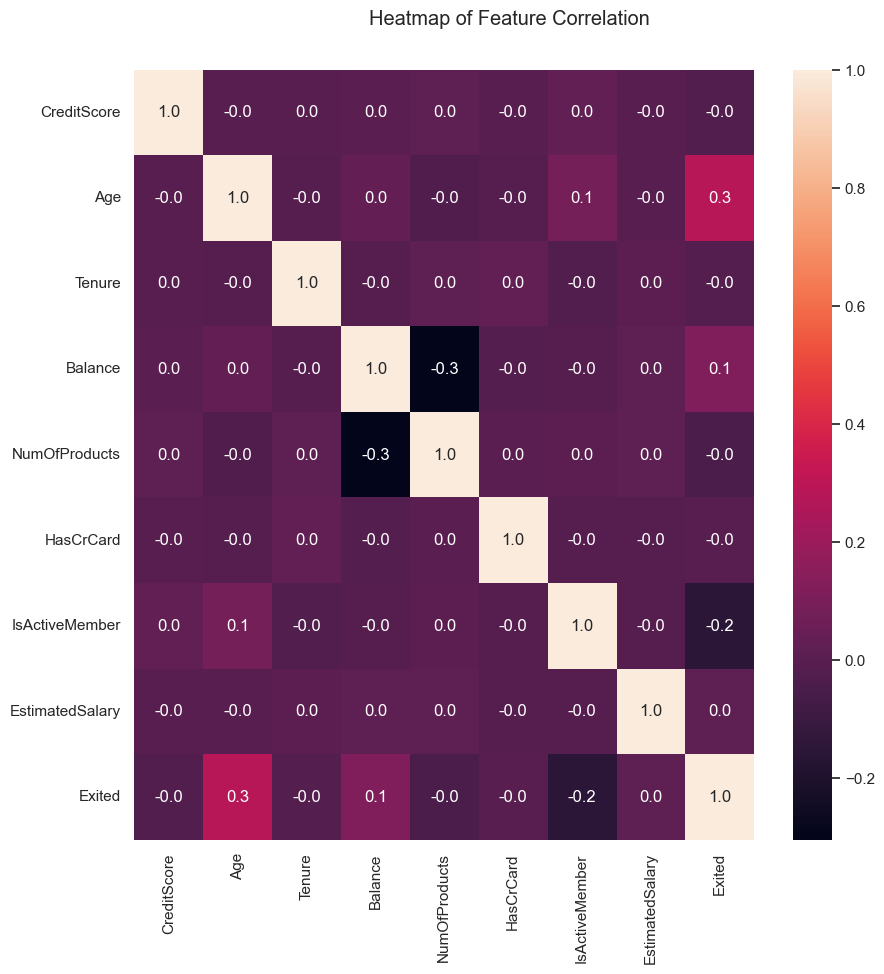

In [22]:
"""
Parameters:
    data (DataFrame): The input data.
    title (str): The title of the heatmap.
"""

def plot_heatmap(data, title):
    """
    Plot a heatmap of feature correlation.

    Args:
        data (DataFrame): The input data.
        title (str): The title of the heatmap.
    """
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, y=0.94)

    # Plot a heatmap of feature correlation
    sns.heatmap(data.corr(), annot=True, fmt='.1f')
    plt.show()


plot_heatmap(df, 'Heatmap of Feature Correlation')


The correlations observed are generally weak. There is a weak positive correlation with age, a very weak positive correlation with balance, and very weak negative correlations with the number of products and membership. This suggests that many of the correlations within the dataset are non-linear. Consequently, a suitable model for this dataset would be one that performs well on datasets characterized by numerous non-linear correlations, such as Decision Trees, Neural Networks, and Support Vector Machines (SVM).

### Box Plot

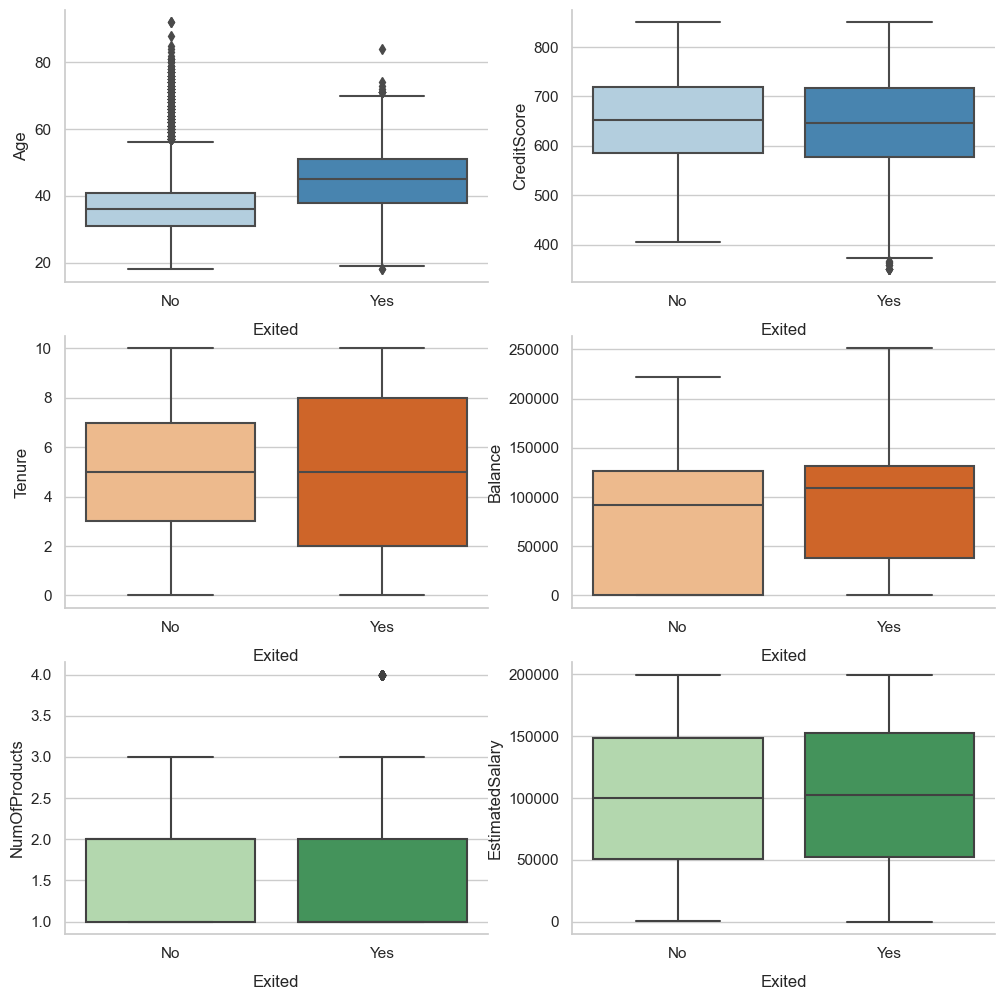

In [23]:
"""
Parameters:
    data (DataFrame): The input data.
    numerical_labels (list of lists): Nested list of numerical feature labels.
    color_palettes (list of str): List of color palettes for boxplots.
"""

def plot_numerical_boxplots(data, numerical_labels, color_palettes):
    """
    Plot boxplots for numerical features grouped by the target variable.

    Args:
        data (DataFrame): The input data.
        numerical_labels (list of lists): Nested list of numerical feature labels.
        color_palettes (list of str): List of color palettes for boxplots.
    """
    fig, ax = plt.subplots(len(numerical_labels), len(numerical_labels[0]), figsize=(12, 12))
    
    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            feature = numerical_labels[i][j]
            palette = color_palettes[i]
            sns.boxplot(x=data['Exited'], y=data[feature], palette=palette, ax=col)
            col.set_xlabel('Exited', labelpad=10)
            col.set_xticklabels(['No', 'Yes'])
    
    sns.despine()


plot_numerical_boxplots(df, [['Age', 'CreditScore'], ['Tenure', 'Balance'], ['NumOfProducts','EstimatedSalary']],
                         ['Blues', 'Oranges', 'Greens'])


Analysis of the plots reveals the following observations:

1.Churning customers are typically older than those who remain with the bank.

2.No notable distinctions in median credit score or tenure are apparent between customers who churn and those who stay.

3.A considerable portion of customers who churn still maintains a substantial balance in their bank accounts.

4.Neither estimated salary nor the number of products appears to exert a significant influence on customer churn.

## Pairplot

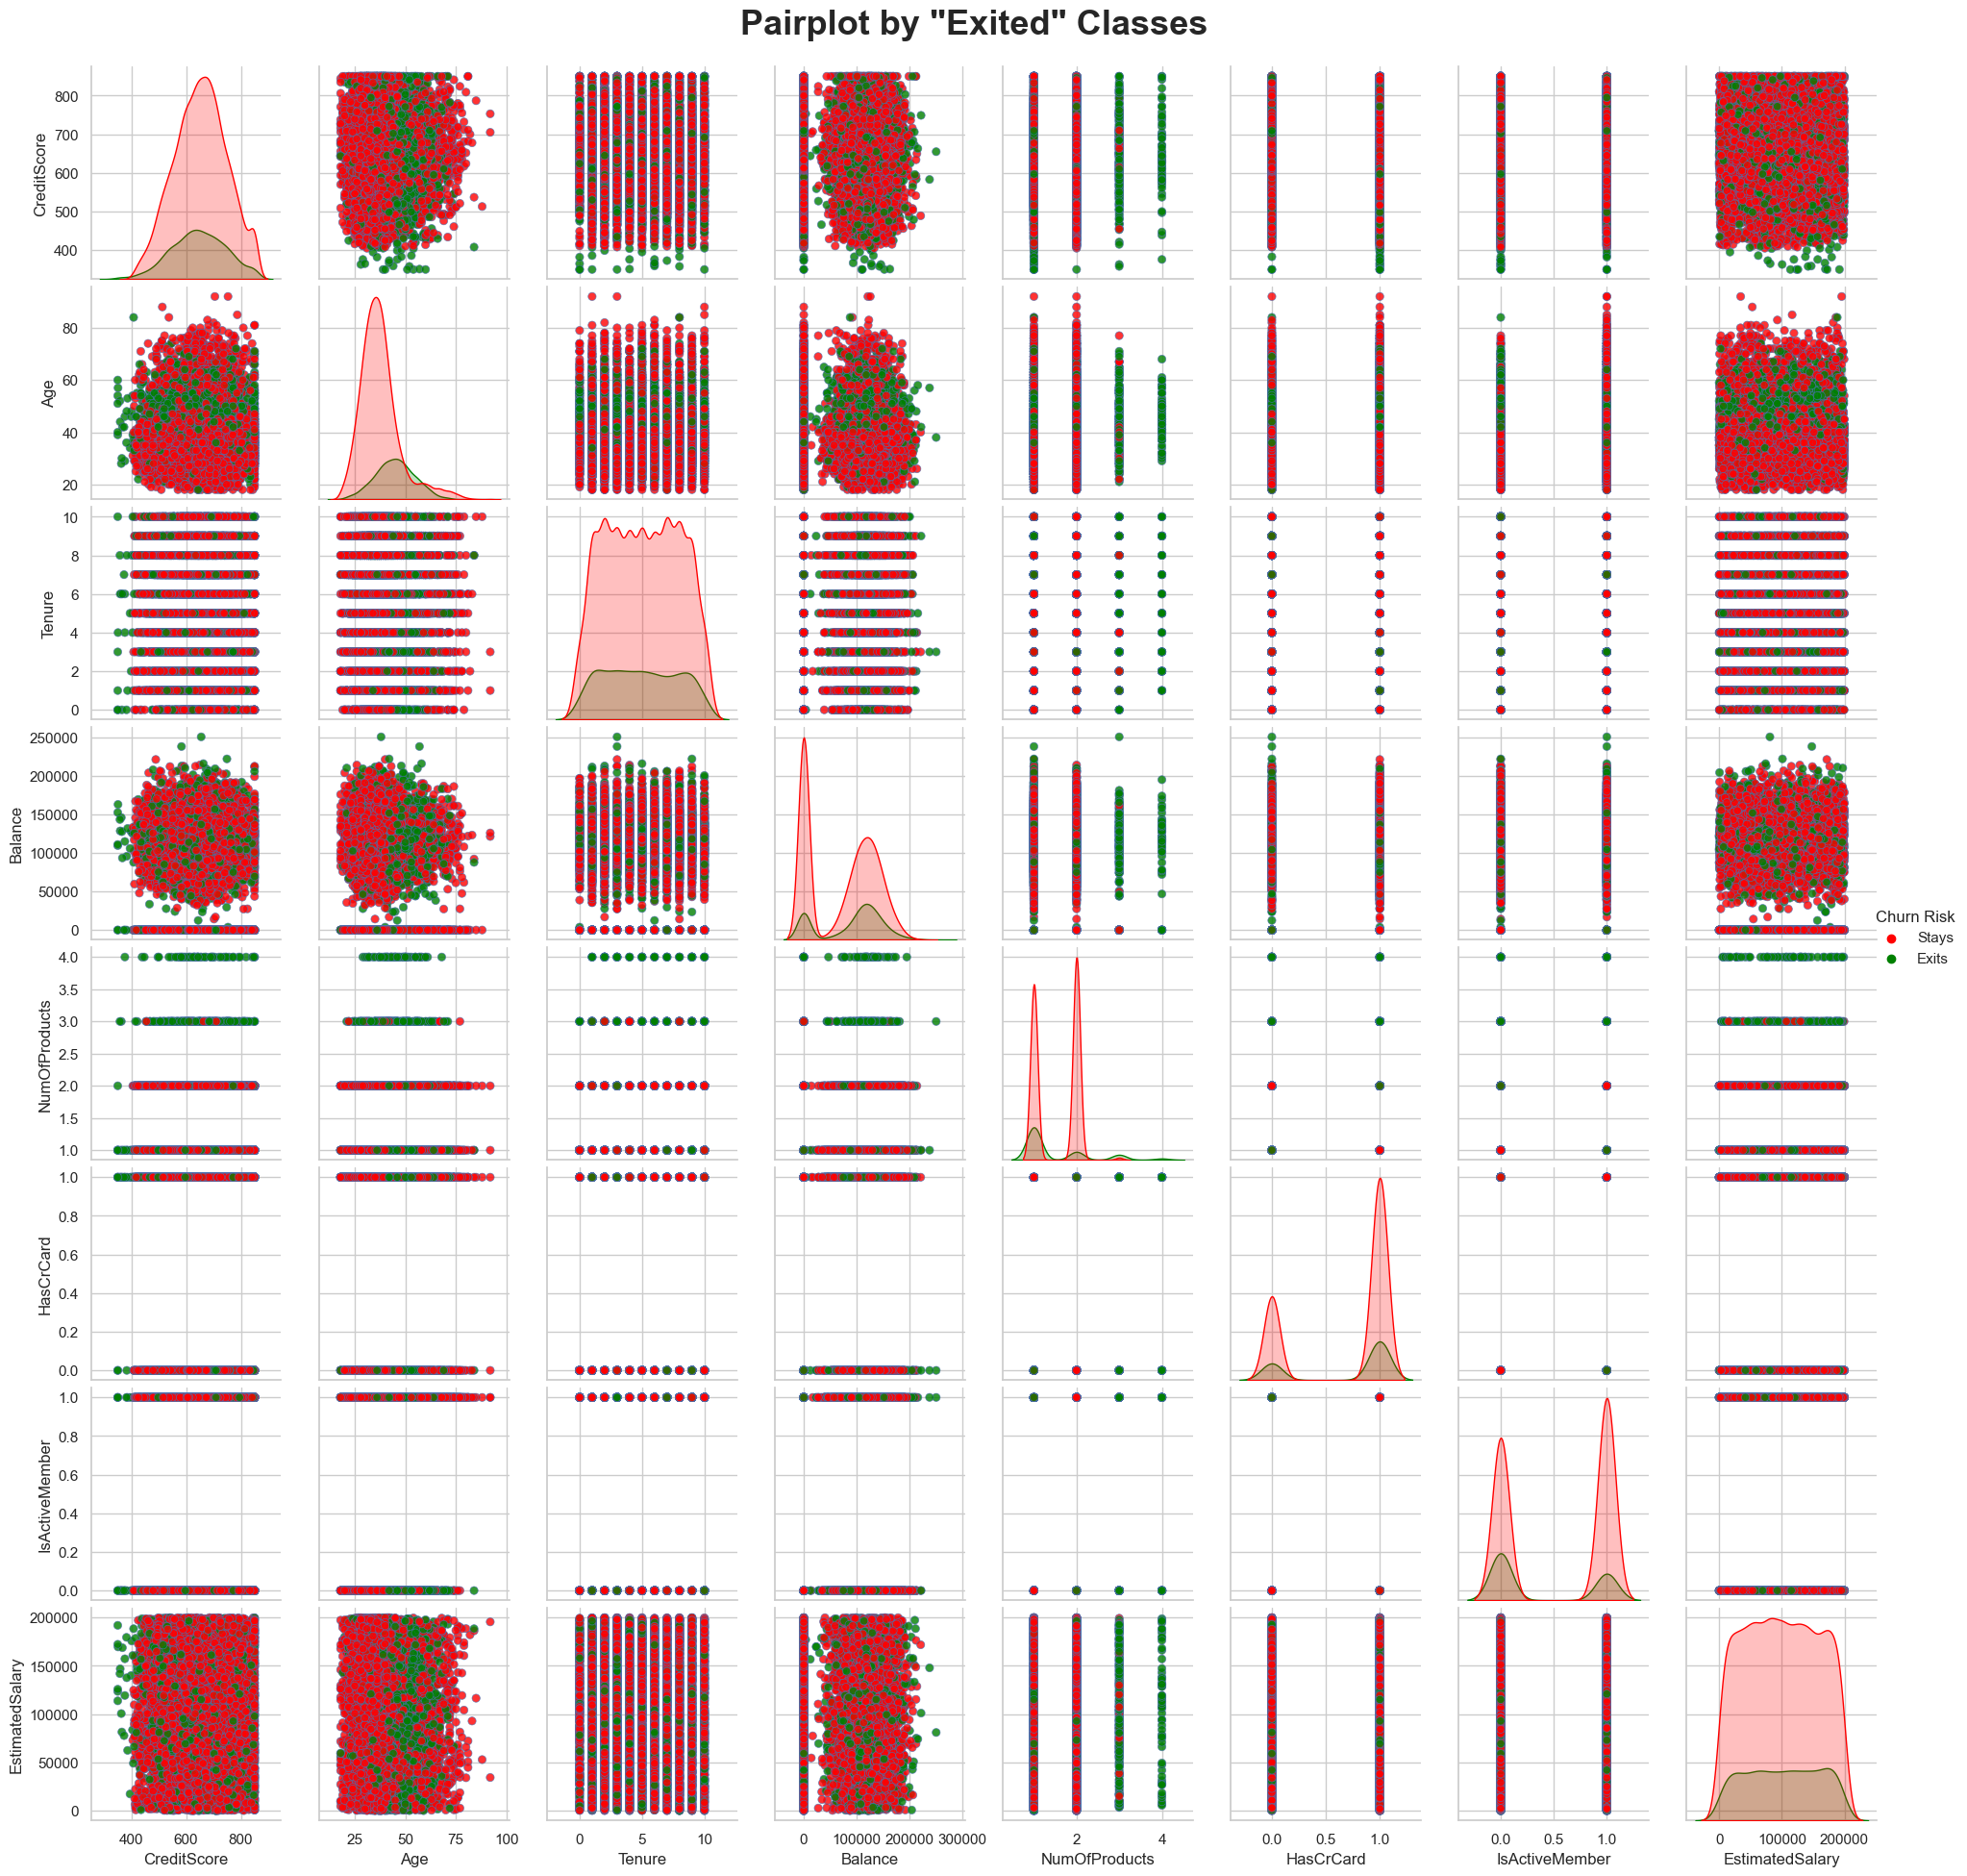

In [24]:
def plot_pairplot(df, hue_column='Exited', palette_colors={1: 'green', 0: 'red'},
                  plot_alpha=0.8, edge_color='b', line_width=0.5,
                  suptitle='Pairplot by "Exited" Classes',
                  title_fontsize=26, title_fontweight='bold',
                  legend_title='Churn Risk', legend_labels=['Stays', 'Exits']):
    """
    Plot Seaborn's pairplot for a DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.
        hue_column (str): The column to differentiate classes (default is 'Exited').
        palette_colors (dict): Color palette for classes (default is {1: 'green', 0: 'red'}).
        plot_alpha (float): Transparency of plot elements (default is 0.8).
        edge_color (str): Color of edges in the plot (default is 'b').
        line_width (float): Width of lines in the plot (default is 0.5).
        suptitle (str): Main title of the plot (default is 'Pairplot by "Exited" Classes').
        title_fontsize (int): Font size of the main title (default is 26).
        title_fontweight (str): Font weight of the main title (default is 'bold').
        legend_title (str): Title for the legend (default is 'Churn Risk').
        legend_labels (list): Labels for legend items (default is ['Stays', 'Exits']).

    Returns:
        Seaborn PairGrid: The created pairplot.
    """
    # Plot Seaborn's pairplot
    pairplot = sns.pairplot(df, hue=hue_column, palette=palette_colors,
                            plot_kws={'alpha': plot_alpha, 'edgecolor': edge_color, 'linewidth': line_width})

    # Adjust subplot parameters
    fig = pairplot.fig
    fig.subplots_adjust(top=0.95, wspace=0.2)
    fig.suptitle(suptitle, fontsize=title_fontsize, fontweight=title_fontweight)

    # Update the legend
    pairplot._legend.set_title(legend_title)

    # Replace legend labels
    for text, label in zip(pairplot._legend.texts, legend_labels):
        text.set_text(label)

    return pairplot


pairplot_example = plot_pairplot(df)
plt.show()


The density plots on the diagonal make it easy to compare distributions. It's clear that only a few features show slightly different distributions. Specifically, the density plot for Age indicates that older individuals tend to have a slightly higher tendency to leave the bank.


Let's simplify the visualization by plotting only four features: Age, IsActiveMember, NumOfProducts, and Balance.

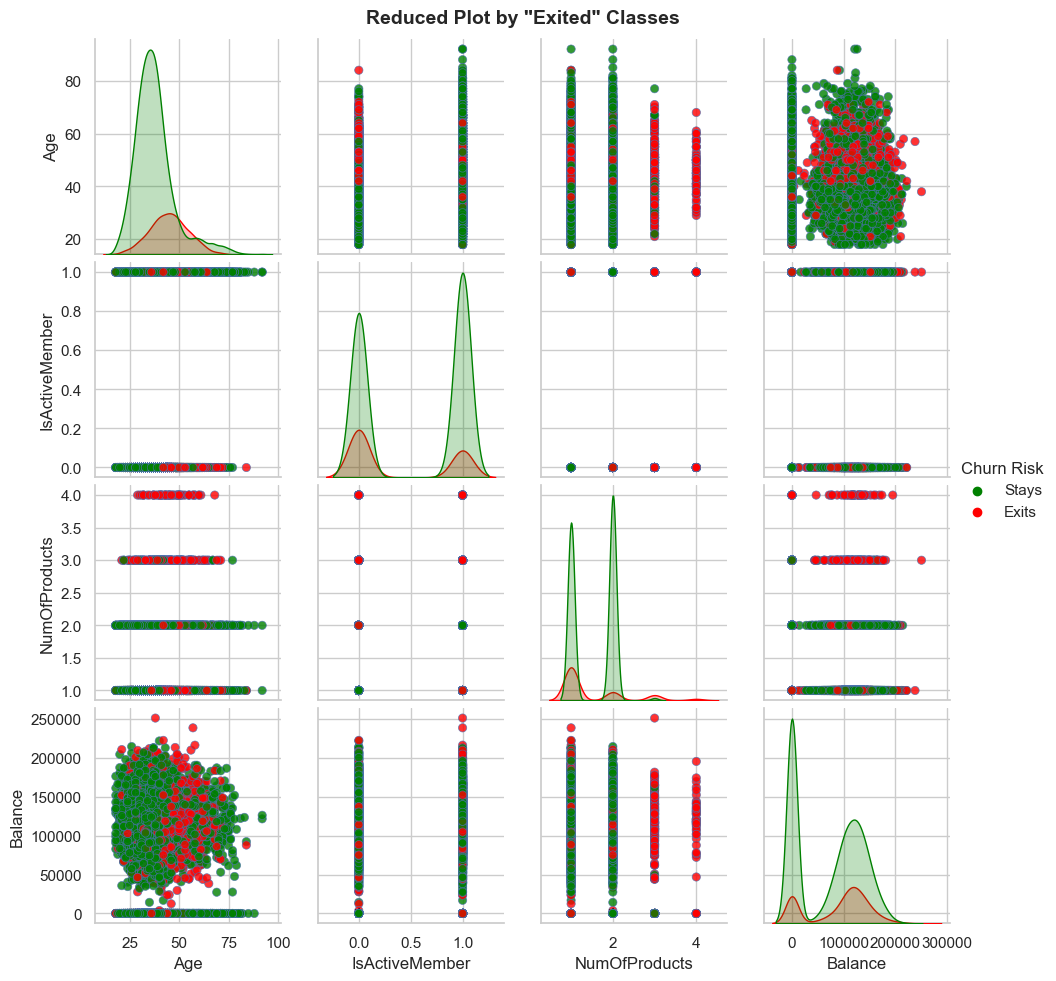

In [25]:
def plot_reduced_pairplot(dataframe, hue_column='Exited', selected_features=['Age', 'IsActiveMember', 'NumOfProducts', 'Balance'],
                          palette_colors={0: 'green', 1: 'red'}, plot_alpha=0.8, edge_color='b', line_width=0.5,
                          suptitle='Reduced Plot by "Exited" Classes', title_fontsize=14, title_fontweight='bold',
                          legend_title='Churn Risk', legend_labels=['Stays', 'Exits']):
    """
    Create a Seaborn pairplot with reduced features.

    Parameters:
        dataframe (DataFrame): The input DataFrame.
        hue_column (str): The column to differentiate classes (default is 'Exited').
        selected_features (list): List of features to include in the pairplot (default is ['Age', 'IsActiveMember', 'NumOfProducts', 'Balance']).
        palette_colors (dict): Color palette for classes (default is {0: 'green', 1: 'red'}).
        plot_alpha (float): Transparency of plot elements (default is 0.8).
        edge_color (str): Color of edges in the plot (default is 'b').
        line_width (float): Width of lines in the plot (default is 0.5).
        suptitle (str): Main title of the plot (default is 'Reduced Plot by "Exited" Classes').
        title_fontsize (int): Font size of the main title (default is 14).
        title_fontweight (str): Font weight of the main title (default is 'bold').
        legend_title (str): Title for the legend (default is 'Churn Risk').
        legend_labels (list): Labels for legend items (default is ['Stays', 'Exits']).

    Returns:
        Seaborn PairGrid: The created pairplot.
    """
    # Create a Seaborn pairplot
    pairplot = sns.pairplot(dataframe, hue=hue_column, vars=selected_features, palette=palette_colors,
                            plot_kws={'alpha': plot_alpha, 'edgecolor': edge_color, 'linewidth': line_width})

    # Adjust figure layout
    fig = pairplot.fig
    fig.subplots_adjust(top=0.95, wspace=0.2)
    fig.suptitle(suptitle, fontsize=title_fontsize, fontweight=title_fontweight)

    # Update the legend
    pairplot._legend.set_title(legend_title)

    # Replace legend labels
    for text, label in zip(pairplot._legend.texts, legend_labels):
        text.set_text(label)

    return pairplot



reduced_pairplot_example = plot_reduced_pairplot(df)
plt.show()


Upon examining the density plots, it becomes evident that the bank encounters a higher frequency of customer churn among older individuals and those with a greater number of products.

## Violin Plots

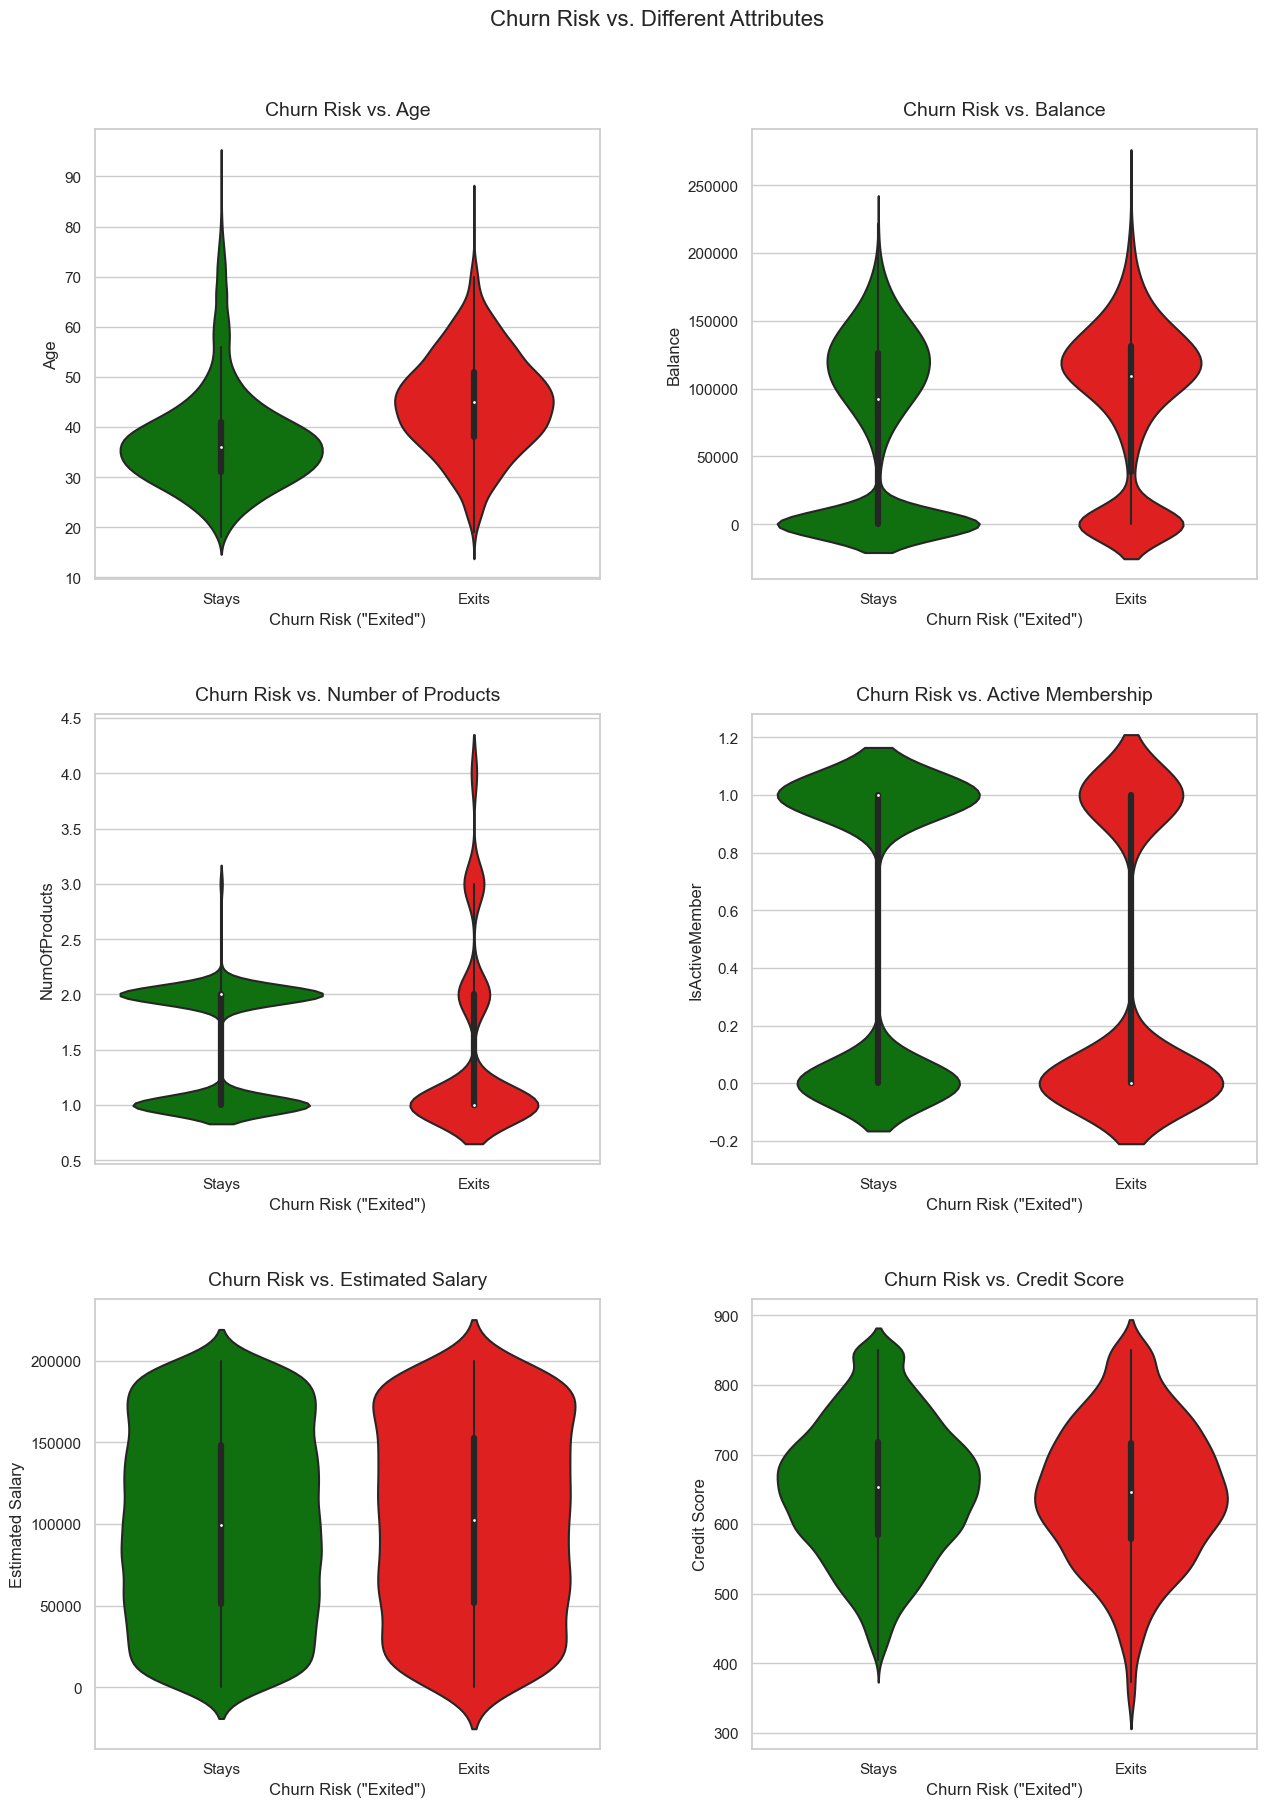

In [26]:
# Set the color palette
color_palette = {'Stays': 'green', 'Exits': 'red'}

# Map numeric classes to categorical classes
class_mapping = {0: 'Stays', 1: 'Exits'}
churn_categories = df['Exited'].map(class_mapping)

# Create subplots for violin plots
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Churn Risk vs. Different Attributes', fontsize=16)
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

# Violin plot for Age
sns.violinplot(x=churn_categories,
               y=df['Age'],
               order=['Stays', 'Exits'],
               palette=color_palette,
               ax=axes[0, 0])

axes[0, 0].set_title('Churn Risk vs. Age', fontsize=14, pad=10)
axes[0, 0].set_ylabel('Age', size=12)
axes[0, 0].set_xlabel('Churn Risk ("Exited")', size=12)

# Violin plot for Balance
sns.violinplot(x=churn_categories,
               y=df['Balance'],
               order=['Stays', 'Exits'],
               palette=color_palette,
               ax=axes[0, 1])

axes[0, 1].set_title('Churn Risk vs. Balance', fontsize=14, pad=10)
axes[0, 1].set_ylabel('Balance', size=12)
axes[0, 1].set_xlabel('Churn Risk ("Exited")', size=12)

# Violin plot for NumOfProducts
sns.violinplot(x=churn_categories,
               y=df['NumOfProducts'],
               order=['Stays', 'Exits'],
               palette=color_palette,
               ax=axes[1, 0])

axes[1, 0].set_title('Churn Risk vs. Number of Products', fontsize=14, pad=10)
axes[1, 0].set_ylabel('NumOfProducts', size=12)
axes[1, 0].set_xlabel('Churn Risk ("Exited")', size=12)

# Violin plot for IsActiveMember
sns.violinplot(x=churn_categories,
               y=df['IsActiveMember'],
               order=['Stays', 'Exits'],
               palette=color_palette,
               ax=axes[1, 1])

axes[1, 1].set_title('Churn Risk vs. Active Membership', fontsize=14, pad=10)
axes[1, 1].set_ylabel('IsActiveMember', size=12)
axes[1, 1].set_xlabel('Churn Risk ("Exited")', size=12)

# Violin plot for EstimatedSalary
sns.violinplot(x=churn_categories,
               y=df['EstimatedSalary'],
               order=['Stays', 'Exits'],
               palette=color_palette,
               ax=axes[2, 0])

axes[2, 0].set_title('Churn Risk vs. Estimated Salary', fontsize=14, pad=10)
axes[2, 0].set_ylabel('Estimated Salary', size=12)
axes[2, 0].set_xlabel('Churn Risk ("Exited")', size=12)

# Violin plot for CreditScore
sns.violinplot(x=churn_categories,
               y=df['CreditScore'],
               order=['Stays', 'Exits'],
               palette=color_palette,
               ax=axes[2, 1])

axes[2, 1].set_title('Churn Risk vs. Credit Score', fontsize=14, pad=10)
axes[2, 1].set_ylabel('Credit Score', size=12)
axes[2, 1].set_xlabel('Churn Risk ("Exited")', size=12)

plt.show()


Violin plots provide further confirmation of the previously made observation that older customers and those with a higher number of products are more inclined to exit the bank.

### Distributions of the Target Feature

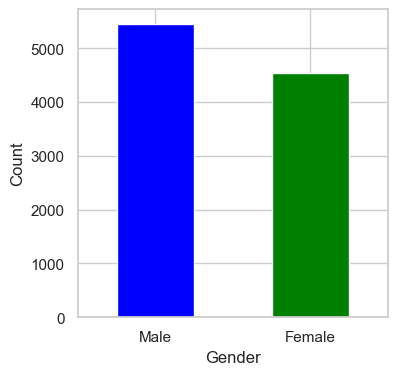

In [27]:
plot_bar_count(df, 'Gender')

The dataset exhibits an imbalance, where the majority class, labeled "Stays" (0), constitutes approximately 80% of the data points, while the minority class, labeled "Exits" (1), comprises around 20% of the datapoints. To mitigate this imbalance in our machine learning algorithms, we will implement SMOTE (Synthetic Minority Over-sampling Technique).







## Feature Enginering

#### As observed earlier, the impact of credit score on churning was inconclusive, possibly because credit score often rises with time and, consequently, with age. To address this, I will create a new feature to capture the relationship between credit score and age.

In [28]:
df['creditscore_age_ratio'] = df['CreditScore'] / df['Age']

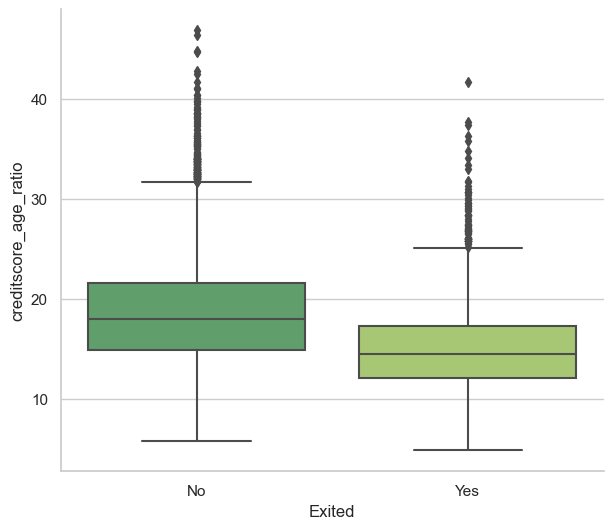

In [29]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(y='creditscore_age_ratio', x='Exited', palette='summer', data=df)
ax.set_xticklabels(['No', 'Yes'])
sns.despine()

It appears that customers who are churning tend to have a smaller credit score-to-age ratio. While the estimated salary was previously observed to have no significant effect on the likelihood of customer churn, exploring the ratio between balance and salary could be interesting. This ratio may provide an estimation of the percentage of a customer's salary being spent and could potentially serve as an indicator of churning.

In [30]:
df['balance_salary_ratio'] = df['Balance'] / df['EstimatedSalary']

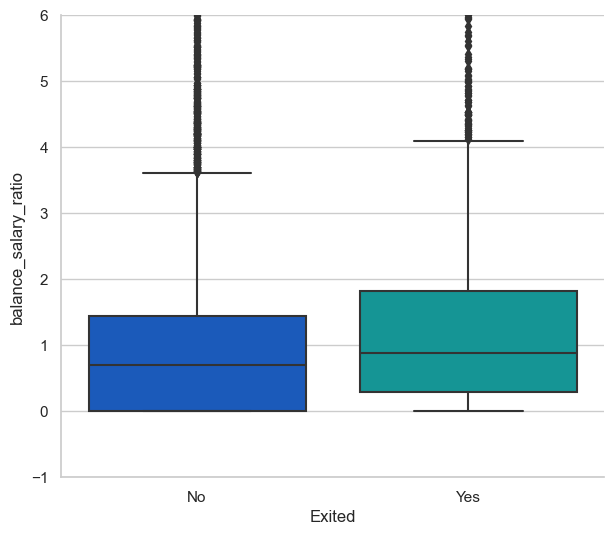

In [31]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(y='balance_salary_ratio', x='Exited', palette='winter', data=df)
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylim(-1, 6)
sns.despine()

From the plot, we can learn that customers with a higher balance salary ratio churn more than those with a lower ratio.

In [32]:
X=df.drop('Exited',axis=1)
y=df.pop('Exited')

In [33]:
# List numerical features
num_columns = X.select_dtypes(include='number').columns.tolist()
num_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'creditscore_age_ratio',
 'balance_salary_ratio']

In [34]:
# List categorical features
cat_columns = X.select_dtypes(include='object').columns.tolist()
cat_columns

['Geography', 'Gender']

In [35]:
def class_count(a):
    counter=Counter(a)
    kv=[list(counter.keys()),list(counter.values())]
    dff = pd.DataFrame(np.array(kv).T, columns=['Exited','Count'])
    dff['Count'] = dff['Count'].astype('int64')
    dff['%'] = round(dff['Count'] / a.shape[0] * 100, 2)
    return dff.sort_values('Count',ascending=False)

In [36]:
class_count(y)

Exited  Count      %
1       0   7963  79.63
0       1   2037  20.37

In [37]:
random_state = 10

# Split X and y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=random_state,
                                                   stratify=y)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

7000 3000 7000 3000


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 8061 to 4741
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CreditScore            7000 non-null   int64  
 1   Geography              7000 non-null   object 
 2   Gender                 7000 non-null   object 
 3   Age                    7000 non-null   int64  
 4   Tenure                 7000 non-null   int64  
 5   Balance                7000 non-null   float64
 6   NumOfProducts          7000 non-null   int64  
 7   HasCrCard              7000 non-null   int64  
 8   IsActiveMember         7000 non-null   int64  
 9   EstimatedSalary        7000 non-null   float64
 10  creditscore_age_ratio  7000 non-null   float64
 11  balance_salary_ratio   7000 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 710.9+ KB


In [39]:
def plot_cm(cm, chart):

    # set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # initialize TP, TN, FN, and FP counts
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initial = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plot heatmap of the confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')
    
    plt.show()

## Pre-processing Pipeline
### Scale numerical data and encode categorical data
Construct a pre-processing pipeline from the given transformers: MinMaxScaler and OneHotEncoder
Creating lists of indexes from the list of column names

Need to be numeric not string to specify columns name in column transformer
    

In [40]:
num_features = []
for column_name in num_columns:
    index_location = X.columns.get_loc(column_name)
    num_features.append(index_location)
print(num_features)

[0, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [41]:
cat_features = []
for column_name in cat_columns:
    index_location = X.columns.get_loc(column_name)
    cat_features.append(index_location)
print(cat_features)

[1, 2]


In [44]:
# Define a column transformer
# Note: Columns need to be specified by index, not column names
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer for preprocessing
# Apply MinMaxScaler to numerical features (num_features) and OneHotEncoder to categorical features (cat_features)
preprocess = make_column_transformer(
    (MinMaxScaler(), num_features),  # MinMax scaling for numerical features
    (OneHotEncoder(sparse=False), cat_features)  # One-hot encoding for categorical features
)

# Display the preprocessing steps
preprocess

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 [0, 3, 4, 5, 6, 7, 8, 9, 10, 11]),
                                ('onehotencoder', OneHotEncoder(sparse=False),
                                 [1, 2])])

MinMaxScaler is applied to numerical features to ensure that they are on a similar scale, preventing any feature from dominating the others due to differences in magnitude.
OneHotEncoder is used to transform categorical features into a numerical format (one-hot encoding). This is necessary because many machine learning algorithms require numerical input and cannot directly handle categorical data.
The column transformer combines these preprocessing steps into a single transformation, making it easier to apply consistently across training and testing datasets

## Building SVM Model Pipeline without SMOTE
To observe the influence of SMOTE on our results, we will initially construct our pipeline without incorporating SMOTE.

In [45]:
# Function for creating model pipelines - imbalanced-learn
from imblearn.pipeline import make_pipeline as imbl_pipe
# Import classifier
from sklearn.svm import SVC 

# Define a model with a pipeline
model_SVM = imbl_pipe(preprocess,
                      SVC(random_state=random_state))

# Display the configured SVM model with the preprocessing pipeline
model_SVM

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2])])),
                ('svc', SVC(random_state=10))])

In [46]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__C': [0.0005, 0.001, 0.01, 0.1, 0.5],
    'svc__gamma': [5, 1, 0.1, 0.01]
}

# Create a GridSearchCV object with the SVM model and parameter grid
grid = GridSearchCV(model_SVM, param_grid, verbose=3, cv=5, n_jobs=4)

This code snippet sets up a GridSearchCV model for fine-tuning the hyperparameters of the SVM model. The parameter grid (param_grid) specifies various values for the SVM kernel, regularization parameter (C), and gamma. The GridSearchCV object is created with the SVM model (model_SVM), the parameter grid, and additional settings such as verbosity, cross-validation folds (cv), and parallel processing (n_jobs).

In [47]:
X_train = X_train.values
X_test = X_test.values

# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         [0, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 9,
                                                                          10,
                                                                          11]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         [1,
                                                                          2])])),
                                       ('svc', SVC(random_state=10))]),
             n_jobs=4,
             param_grid={'svc__C': [0.0005, 0.001, 0.01, 0.1, 0.5],
                         'svc__gamma': [5, 1, 0.1, 0.01],
                         'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [48]:
print(grid.best_params_)

{'svc__C': 0.5, 'svc__gamma': 5, 'svc__kernel': 'poly'}


In [49]:
 # List the best score
print(grid.best_score_)

0.8565714285714285


In [50]:
print(f"Training Data Score: {grid.score(X_train, y_train)}")
print(f"Testing Data Score: {grid.score(X_test, y_test)}")

Training Data Score: 0.8752857142857143
Testing Data Score: 0.8666666666666667


The model demonstrates good performance on the training data, achieving an accuracy of approximately 87.53%.
The testing data score is slightly lower but still respectable at around 86.67%, indicating that the model generalizes reasonably well to new, unseen data. 

In [51]:
# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions with the hypertuned model
predictions = grid.predict(X_test)
cm1 = confusion_matrix(y_test, predictions)
print(cm1)

[[2309   80]
 [ 320  291]]


1 (Positive): Customer exited the bank.
0 (Negative): Customer is still with the bank.
With this understanding, the confusion matrix can be interpreted as follows:

True Positives (TP): 291 customers correctly predicted as having exited the bank.<br>
True Negatives (TN): 2309 customers correctly predicted as still being with the bank.<br>
False Positives (FP): 80 customers incorrectly predicted as having exited when they are still with the bank.<br>
False Negatives (FN): 320 customers incorrectly predicted as still being with the bank when they have exited.<br>

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.78      0.48      0.59       611

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.85      3000



## Building SVM Model Pipeline with SMOTE

Now, let's examine the impact of SMOTE on our results.

We will utilize the Pipeline from the imbalanced-learn (imblearn) package instead of the scikit-learn Pipeline.

This specialized pipeline automatically handles re-sampling during the fit() process and does not re-sample the test data when transform() or predict() is called.

In [53]:
# Import classifier
# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC 

# Define model with pipeline
model_SVM_with_SMOTE = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=random_state),
                  SVC(random_state=random_state))

model_SVM_with_SMOTE

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2])])),
                ('smote', SMOTE(random_state=10)),
                ('svc', SVC(random_state=10))])

In [54]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
              'svc__C': [0.0005,0.001, 0.01, 0.1, 0.5],
              'svc__gamma': [5, 1, 0.1, 0.01]}
grid_s = GridSearchCV(model_SVM_with_SMOTE, param_grid, verbose=3, cv= 5, n_jobs=4)

In [55]:
# Train the model with GridSearch
grid_s.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         [0, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 9,
                                                                          10,
                                                                          11]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         [1,
                                                                          2])])),
                                       ('smote', SMOTE(random_state=10)),
                                       ('svc', SVC(random_state=10))]),
             n_jobs=4,
             param_grid={'svc__C': [0.0005, 0.001, 0.01, 0.1, 0.5],
                         'svc__gamma': [5, 1, 0.1, 0.01],
                         'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [56]:
print(grid_s.best_params_)
print(grid_s.best_score_)

{'svc__C': 0.5, 'svc__gamma': 5, 'svc__kernel': 'poly'}
0.8142857142857143


In [57]:
print(f"Training Data Score: {grid_s.score(X_train, y_train)}")
print(f"Testing Data Score: {grid_s.score(X_test, y_test)}")

Training Data Score: 0.846
Testing Data Score: 0.8143333333333334


The model exhibits a decent level of accuracy on both the training and testing datasets.
The slight decrease in accuracy on the testing data suggests that the model may be slightly overfitting to the training data, but it still generalizes well to new data.

In [58]:
# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report
# Make predictions with the hypertuned model
predictions_s = grid_s.predict(X_test)
predictions_s
cm2 = confusion_matrix(y_test, predictions_s)
print(cm2)

[[2028  361]
 [ 196  415]]


True Positives (TP): 415instances correctly predicted as positive.<br>
True Negatives (TN): 2028 instances correctly predicted as negative.<br>
False Positives (FP): 361 instances incorrectly predicted as positive when they are actually negative.<br>
False Negatives (FN): 196 instances incorrectly predicted as negative when they are actually positive.<br>

In [59]:
# Import classifier
from sklearn.ensemble import RandomForestClassifier

# Define model with pipeline
model_random_forest = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=random_state),
                  RandomForestClassifier())

model_random_forest

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2])])),
                ('smote', SMOTE(random_state=10)),
                ('randomforestclassifier', RandomForestClassifier())])

In [60]:
 # Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
rf_param_grid = {
    'randomforestclassifier__n_estimators' : [50, 100, 150],
    'randomforestclassifier__max_features' : ['sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 5 ,10, 15],
    'randomforestclassifier__criterion' : ['gini', 'entropy'],
    'randomforestclassifier__min_samples_split' : [2, 3, 4]
}
rf_grid = GridSearchCV(model_random_forest, rf_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [61]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.833 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.840 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.839 total time=   4.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.829 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.825 total time=   4.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.837 total time=   4.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.842 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.846 total time=   7.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.837 total time=   7.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.826 total time=   6.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.833 total time=   7.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.836 total time=   6.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.833 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.819 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.836 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.837 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.831 total time=   4.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.821 total time=   4.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.829 total time=   4.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.846 total time=   4.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.841 total time=   7.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.831 total time=   6.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.823 total time=   7.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.829 total time=   6.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.844 total time=   7.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.835 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.827 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.821 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.821 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.846 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.829 total time=   4.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.838 total time=   4.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.824 total time=   4.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.834 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.841 total time=   4.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.832 total time=   6.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.834 total time=   7.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.823 total time=   6.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.831 total time=   7.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.851 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.832 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.807 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.823 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.834 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.833 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.830 total time=   3.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.805 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.821 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.839 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.835 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.824 total time=   6.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.809 total time=   5.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.830 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.844 total time=   5.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.837 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.818 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.810 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.825 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.837 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.837 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.825 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.812 total time=   3.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.822 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.838 total time=   3.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.834 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.827 total time=   6.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.809 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.820 total time=   5.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.834 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.838 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.827 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.803 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.819 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.830 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.838 total time=   4.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.831 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.809 total time=   3.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.829 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.835 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.840 total time=   5.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.834 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.809 total time=   5.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.821 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.840 total time=   6.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.831 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.827 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.806 total time=   1.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.814 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.826 total time=   1.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.829 total time=   3.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.823 total time=   3.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.804 total time=   3.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.820 total time=   3.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.830 total time=   3.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.831 total time=   5.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.821 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.809 total time=   5.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.820 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.836 total time=   5.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.831 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.819 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.809 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.816 total time=   1.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.822 total time=   1.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.826 total time=   3.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.824 total time=   3.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.807 total time=   3.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.818 total time=   3.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.830 total time=   3.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.828 total time=   5.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.820 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.808 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.818 total time=   5.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.824 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.827 total time=   1.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.814 total time=   1.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.800 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.816 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.831 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.828 total time=   3.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.816 total time=   3.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.808 total time=   3.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.820 total time=   3.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.831 total time=   3.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.826 total time=   5.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.826 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.806 total time=   5.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.817 total time=   5.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.829 total time=   5.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.825 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.819 total time=   1.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.799 total time=   1.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.811 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.824 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.825 total time=   3.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.816 total time=   3.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.803 total time=   3.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.809 total time=   3.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.823 total time=   3.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.826 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.814 total time=   4.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.804 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.814 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.824 total time=   4.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.821 total time=   1.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.819 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.801 total time=   1.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.806 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.818 total time=   1.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.821 total time=   3.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.815 total time=   3.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.796 total time=   3.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.820 total time=   3.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.822 total time=   3.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.825 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.817 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.803 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.810 total time=   4.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.823 total time=   4.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.821 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.817 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.798 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.803 total time=   1.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.819 total time=   1.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.829 total time=   3.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.815 total time=   3.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.807 total time=   3.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.811 total time=   3.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.827 total time=   3.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.823 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.818 total time=   5.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.801 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.808 total time=   4.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.825 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.826 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.838 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.844 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.836 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.834 total time=   5.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.826 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.835 total time=   5.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.850 total time=   5.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.833 total time=   8.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.833 total time=   8.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.824 total time=   8.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.833 total time=   8.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.845 total time=   8.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.833 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.824 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.823 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.843 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.837 total time=   5.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.833 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.828 total time=   5.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.831 total time=   5.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.844 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.829 total time=   8.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.836 total time=   8.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.830 total time=   8.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.834 total time=   8.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.849 total time=   8.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.839 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.827 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.821 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.841 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.842 total time=   5.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.832 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.824 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.829 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.841 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.837 total time=   8.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.831 total time=   8.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.826 total time=   8.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.833 total time=   8.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.849 total time=   8.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.840 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.811 total time=   2.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.823 total time=   2.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.839 total time=   2.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.835 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.831 total time=   5.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.813 total time=   5.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.824 total time=   4.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.839 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.836 total time=   7.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.833 total time=   7.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.813 total time=   7.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.831 total time=   7.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.836 total time=   7.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.839 total time=   2.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.821 total time=   2.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.812 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.825 total time=   2.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.840 total time=   2.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.839 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.831 total time=   4.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.809 total time=   5.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.829 total time=   4.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.841 total time=   4.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.836 total time=   7.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.830 total time=   7.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.811 total time=   7.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.832 total time=   7.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.836 total time=   7.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.834 total time=   2.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.811 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.825 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.836 total time=   2.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.840 total time=   5.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.826 total time=   5.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.815 total time=   4.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.822 total time=   5.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.839 total time=   4.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.840 total time=   7.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.829 total time=   7.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.812 total time=   7.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.831 total time=   7.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.844 total time=   7.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.819 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.809 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.819 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.826 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.834 total time=   4.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.821 total time=   4.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.804 total time=   4.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.827 total time=   4.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.824 total time=   4.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.835 total time=   7.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.820 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.806 total time=   6.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.820 total time=   6.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.829 total time=   7.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.817 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.811 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.814 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.829 total time=   4.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.821 total time=   4.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.809 total time=   4.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.823 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.830 total time=   4.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.830 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.822 total time=   7.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.807 total time=   6.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.819 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.831 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.827 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.819 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.808 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.834 total time=   4.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.820 total time=   4.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.807 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.822 total time=   4.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.832 total time=   4.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.834 total time=   6.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.826 total time=   6.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.810 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.825 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.834 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.825 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.816 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.800 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.821 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.826 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.826 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.818 total time=   4.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.804 total time=   4.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.814 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.829 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.826 total time=   6.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.824 total time=   6.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.806 total time=   6.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.819 total time=   6.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.823 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.827 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.816 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.808 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.814 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.831 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.814 total time=   4.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.806 total time=   4.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.812 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.826 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.827 total time=   6.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.819 total time=   6.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.809 total time=   6.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.819 total time=   6.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.824 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.833 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.819 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.799 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.819 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.821 total time=   4.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.817 total time=   4.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.806 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.816 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.819 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.824 total time=   6.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.821 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.804 total time=   6.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.823 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.823 total time=   6.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.837 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.833 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.821 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.832 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.844 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.843 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.839 total time=   5.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.822 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.829 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.841 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.834 total time=   8.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.841 total time=   8.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.825 total time=   8.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.829 total time=   8.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.851 total time=   8.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.845 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.843 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.839 total time=   5.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.839 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.826 total time=   5.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.831 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.846 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.839 total time=   8.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.836 total time=   8.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.824 total time=   8.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.829 total time=   8.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.845 total time=   8.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.840 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.834 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.826 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.843 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.832 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.836 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.818 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.829 total time=   5.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.836 total time=   5.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.838 total time=   8.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.837 total time=   8.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.824 total time=   8.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.828 total time=   8.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.844 total time=   8.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.834 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.825 total time=   2.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.808 total time=   2.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.819 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.825 total time=   4.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.830 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.813 total time=   4.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.830 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.835 total time=   4.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.832 total time=   7.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.833 total time=   7.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.812 total time=   7.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.824 total time=   7.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.841 total time=   7.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.832 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.814 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.822 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.841 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.840 total time=   4.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.832 total time=   4.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.812 total time=   4.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.819 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.839 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.839 total time=   7.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.829 total time=   7.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.812 total time=   7.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.827 total time=   7.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.839 total time=   7.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.834 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.823 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.804 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.814 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.830 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.837 total time=   4.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.827 total time=   4.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.811 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.823 total time=   4.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.836 total time=   4.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.831 total time=   7.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.829 total time=   7.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.806 total time=   7.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.821 total time=   7.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.840 total time=   7.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.812 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.818 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.835 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.832 total time=   4.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.823 total time=   5.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.806 total time=   4.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.821 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.828 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.825 total time=   6.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.824 total time=   6.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.812 total time=   6.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.824 total time=   6.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.831 total time=   6.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.836 total time=   2.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.804 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.818 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.825 total time=   2.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.830 total time=   4.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.816 total time=   4.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.805 total time=   4.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.824 total time=   4.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.828 total time=   4.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.829 total time=   6.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.826 total time=   6.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.806 total time=   6.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.825 total time=   6.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.826 total time=   6.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.827 total time=   2.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.811 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.809 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.817 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.833 total time=   4.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.825 total time=   4.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.804 total time=   4.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.823 total time=   4.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.829 total time=   4.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.829 total time=   6.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.825 total time=   6.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.809 total time=   6.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.821 total time=   6.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.831 total time=   6.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.820 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.805 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.813 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.821 total time=   4.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.817 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.806 total time=   3.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.814 total time=   3.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.821 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.828 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.818 total time=   5.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.801 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.811 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.821 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.821 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.814 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.805 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.806 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.826 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.825 total time=   4.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.816 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.805 total time=   3.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.810 total time=   3.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.829 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.826 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.819 total time=   5.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.802 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.810 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.826 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.819 total time=   2.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.803 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.810 total time=   2.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.819 total time=   1.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.819 total time=   3.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.819 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.802 total time=   4.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.819 total time=   3.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.821 total time=   3.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.820 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.820 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.806 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.809 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.824 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.842 total time=   3.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.834 total time=   3.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.831 total time=   3.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.838 total time=   3.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.849 total time=   3.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.840 total time=   7.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.839 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.825 total time=   6.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.834 total time=   6.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.836 total time=   7.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.842 total time=  10.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.838 total time=  10.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.824 total time=  10.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.832 total time=  10.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.847 total time=  10.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.844 total time=   3.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.837 total time=   3.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.826 total time=   3.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.831 total time=   3.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.843 total time=   3.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.845 total time=   7.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.839 total time=   7.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.819 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.831 total time=   6.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.854 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.841 total time=  10.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.840 total time=  10.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.828 total time=  10.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.834 total time=  10.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.839 total time=  10.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.834 total time=   3.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.839 total time=   3.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.824 total time=   3.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.829 total time=   3.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.840 total time=   3.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.831 total time=   7.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.836 total time=   6.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.831 total time=   6.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.825 total time=   6.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.844 total time=   6.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.836 total time=  10.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.840 total time=  10.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.829 total time=  10.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.831 total time=  10.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.852 total time=  10.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.829 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.816 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.826 total time=   3.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.843 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.837 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.830 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.816 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.828 total time=   5.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.836 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.837 total time=   9.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.829 total time=   9.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.813 total time=   8.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.824 total time=   9.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.842 total time=   8.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.842 total time=   3.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.826 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.811 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.825 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.834 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.840 total time=   6.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.836 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.814 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.824 total time=   5.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.844 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.841 total time=   9.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.830 total time=   9.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.814 total time=   9.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.833 total time=   9.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.844 total time=   9.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.836 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.826 total time=   3.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.809 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.834 total time=   3.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.839 total time=   6.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.827 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.816 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.835 total time=   6.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.840 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.841 total time=   9.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.830 total time=   8.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.811 total time=   9.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.832 total time=   8.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.839 total time=   9.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.823 total time=   2.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.807 total time=   2.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.821 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.830 total time=   2.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.835 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.824 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.807 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.820 total time=   5.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.836 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.830 total time=   8.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.821 total time=   8.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.811 total time=   7.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.821 total time=   8.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.834 total time=   7.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.832 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.801 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.816 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.836 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.834 total time=   5.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.826 total time=   5.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.808 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.828 total time=   5.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.838 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.835 total time=   8.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.822 total time=   8.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.811 total time=   8.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.825 total time=   8.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.832 total time=   8.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.837 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.817 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.814 total time=   3.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.816 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.829 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.831 total time=   5.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.823 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.807 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.824 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.836 total time=   5.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.834 total time=   8.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.824 total time=   8.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.809 total time=  10.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.820 total time=   8.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.832 total time=   9.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.814 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.810 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.824 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.825 total time=   2.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.831 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.824 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.801 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.814 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.827 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.832 total time=   8.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.819 total time=   8.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.808 total time=   8.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.821 total time=   8.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150;, score=0.820 total time=   8.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.826 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.810 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.806 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.818 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=50;, score=0.826 total time=   3.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.831 total time=   6.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.824 total time=   6.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.806 total time=   5.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.821 total time=   5.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=100;, score=0.824 total time=   5.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.826 total time=   8.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.818 total time=   8.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.807 total time=   8.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.811 total time=   9.0s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.831 total time=   8.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.831 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.816 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.802 total time=   2.8s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.819 total time=   2.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=50;, score=0.826 total time=   2.9s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.826 total time=   5.6s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.821 total time=   5.4s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.806 total time=   5.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.820 total time=   5.7s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100;, score=0.826 total time=   5.5s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.828 total time=   8.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.817 total time=   8.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.807 total time=   8.1s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.817 total time=   8.2s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV 5/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=150;, score=0.824 total time=   8.3s


C:\Users\susha\anaconda3\envs\inf200jan\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         [0, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 9,
                                                                          10,
                                                                          11]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         [1,
                                                                          2])])),
                                       ('smote', SMOTE(random_state=10)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_features': ['sqrt', 0.33],
                         'randomforestclassifier__min_samples_leaf': [1, 5, 10,
                                                                      15],
                         'randomforestclassifier__min_samples_split': [2, 3, 4],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  150]},
             scoring='accuracy', verbose=3)

In [62]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_features': 0.33, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
0.8390000000000001


In [63]:
print(f"Training Data Score: {rf_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_grid.score(X_test, y_test)}")

Training Data Score: 0.9998571428571429
Testing Data Score: 0.836


A perfect training data score could indicate potential overfitting, where the model memorizes the training data but struggles to generalize to unseen data. Further evaluation and potentially adjusting the model's complexity may be necessary.

In [64]:
predictions = rf_grid.predict(X_test)
cm3 = confusion_matrix(y_test, predictions)
print(cm3)

[[2134  255]
 [ 237  374]]


True Positives (TP): 374 instances correctly predicted as positive.<br>
True Negatives (TN): 2134 instances correctly predicted as negative.<br>
False Positives (FP): 255 instances incorrectly predicted as positive when they are actually negative.<br>
False Negatives (FN): 234 instances incorrectly predicted as negative when they are actually positive.<br>

Using ANN

In [68]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=5)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=5)

# Display the sizes of the resulting sets
print("The size of X_train is {}".format(X_train.shape[0]))
print("The size of X_val is {}".format(X_val.shape[0]))
print("The size of X_test is {}".format(X_test.shape[0]))

The size of X_train is 8100
The size of X_val is 900
The size of X_test is 1000


Standardizing numerical features is a common preprocessing step to improve the performance, stability, and interpretability of machine learning models. It ensures that the model can effectively learn from and generalize to the data.

In [69]:
# Standardizing the train, validation, and test data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Define the numerical columns to be standardized
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Standardize the training data
num_subset_train = scaler.fit_transform(X_train[num_cols])
X_train_num_df = pd.DataFrame(num_subset_train, columns=num_cols)
X_train_num_df['Geography'] = list(X_train['Geography'])
X_train_num_df['Gender'] = list(X_train['Gender'])
X_train_num_df['HasCrCard'] = list(X_train['HasCrCard'])
X_train_num_df['IsActiveMember'] = list(X_train['IsActiveMember'])

# Standardize the validation data
num_subset_val = scaler.fit_transform(X_val[num_cols])
X_val_num_df = pd.DataFrame(num_subset_val, columns=num_cols)
X_val_num_df['Geography'] = list(X_val['Geography'])
X_val_num_df['Gender'] = list(X_val['Gender'])
X_val_num_df['HasCrCard'] = list(X_val['HasCrCard'])
X_val_num_df['IsActiveMember'] = list(X_val['IsActiveMember'])

# Standardize the test data
num_subset_test = scaler.fit_transform(X_test[num_cols])
X_test_num_df = pd.DataFrame(num_subset_test, columns=num_cols)
X_test_num_df['Geography'] = list(X_test['Geography'])
X_test_num_df['Gender'] = list(X_test['Gender'])
X_test_num_df['HasCrCard'] = list(X_test['HasCrCard'])
X_test_num_df['IsActiveMember'] = list(X_test['IsActiveMember'])

In [70]:
# Convert the categorical features to numerical using one-hot encoding
X_train_num_df = pd.get_dummies(X_train_num_df, columns=['Geography', 'Gender'])
X_test_num_df = pd.get_dummies(X_test_num_df, columns=['Geography', 'Gender'])
X_val_num_df = pd.get_dummies(X_val_num_df, columns=['Geography', 'Gender'])

# Display the head of the transformed training dataset
X_train_num_df.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary  \
0    -1.178587 -1.041960 -1.732257  0.198686       0.820905         1.560315   
1    -0.380169 -1.326982  1.730718 -0.022020      -0.907991        -0.713592   
2    -0.349062  1.808258 -0.693364  0.681178       0.820905        -1.126515   
3     0.625629  2.378302 -0.347067 -1.229191       0.820905        -1.682740   
4    -0.203895 -1.136967  1.730718  0.924256      -0.907991         1.332535   

   HasCrCard  IsActiveMember  Geography_Denmark  Geography_Finland  \
0          1               1                  0                  0   
1          1               0                  1                  0   
2          1               0                  0                  1   
3          1               1                  0                  0   
4          1               1                  1                  0   

   Geography_Sweden  Gender_Female  Gender_Male  
0                 1              0            1  
1                 0              1            0  
2                 0              1            0  
3                 1              0            1  
4                 0              0            1

In this code, the categorical features in the training, validation, and test datasets ('Geography' and 'Gender') are converted into numerical format using one-hot encoding. One-hot encoding creates binary columns for each category, representing the presence or absence of that category in each observation. This transformation allows the machine learning model to effectively process and learn from categorical data

Initialize and build the model

In [71]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model_ANN=Sequential()
model_ANN.add(Dense(7,activation='relu'))
model_ANN.add(Dense(10,activation='relu'))
model_ANN.add(Dense(1,activation='sigmoid'))
optimizer=tf.keras.optimizers.Adam(0.01)
model_ANN.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

This code sets up a basic feedforward neural network with one input layer, two hidden layers, and one output layer for binary classification. The model is compiled with the specified optimizer and loss function, making it ready for training.

In [72]:
model_ANN.fit(X_train_num_df,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
810/810 [==============================] - 4s 3ms/step - loss: 0.3958 - accuracy: 0.8307
Epoch 2/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3534 - accuracy: 0.8548
Epoch 3/100
810/810 [==============================] - 2s 3ms/step - loss: 0.3454 - accuracy: 0.8593
Epoch 4/100
810/810 [==============================] - 2s 3ms/step - loss: 0.3431 - accuracy: 0.8601
Epoch 5/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3420 - accuracy: 0.8627
Epoch 6/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3427 - accuracy: 0.8614
Epoch 7/100
810/810 [==============================] - 2s 3ms/step - loss: 0.3391 - accuracy: 0.8631
Epoch 8/100
810/810 [==============================] - 3s 4ms/step - loss: 0.3383 - accuracy: 0.8614
Epoch 9/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3367 - accuracy: 0.8619
Epoch 10/100
810/810 [==============================] - 3s 4ms/step - loss: 0.3361 - accura

810/810 [==============================] - 3s 3ms/step - loss: 0.3262 - accuracy: 0.8649
Epoch 82/100
810/810 [==============================] - 3s 4ms/step - loss: 0.3264 - accuracy: 0.8664
Epoch 83/100
810/810 [==============================] - 3s 4ms/step - loss: 0.3252 - accuracy: 0.8662
Epoch 84/100
810/810 [==============================] - 3s 4ms/step - loss: 0.3248 - accuracy: 0.8705
Epoch 85/100
810/810 [==============================] - 3s 4ms/step - loss: 0.3261 - accuracy: 0.8669
Epoch 86/100
810/810 [==============================] - 3s 4ms/step - loss: 0.3245 - accuracy: 0.8638
Epoch 87/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3261 - accuracy: 0.8677
Epoch 88/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3249 - accuracy: 0.8656
Epoch 89/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3243 - accuracy: 0.8644
Epoch 90/100
810/810 [==============================] - 3s 4ms/step - loss: 0.3250 - accuracy: 

Predicting the Results using 0.5 threshold

In [73]:
y_pred_val=model_ANN.predict(X_val_num_df)
y_pred_val[y_pred_val>0.5]=1
y_pred_val[y_pred_val <0.5]=0

29/29 [==============================] - 0s 4ms/step


This code transforms the continuous predictions from the ANN into binary predictions by applying a threshold of 0.5. Values above the threshold are considered as class 1, and values below the threshold are considered as class 0.

In [74]:
y_pred_val=y_pred_val.tolist()
X_compare_val=X_val.copy()
X_compare_val['y_actual']=y_val
X_compare_val['y_pred']=y_pred_val
X_compare_val.head(10)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
340           642   Finland  Female   40       6  129502.49              2   
8622          706   Finland    Male   36       9   58571.18              2   
8401          535   Denmark    Male   58       1       0.00              2   
4338          714   Denmark    Male   25       2       0.00              1   
8915          606    Sweden    Male   36       1  155655.46              1   
2624          605   Denmark  Female   29       3  116805.82              1   
2234          720    Sweden  Female   38      10       0.00              2   
349           582    Sweden    Male   39       5       0.00              2   
3719          850    Sweden  Female   62       1  124678.35              1   
2171          526   Finland    Male   58       9  190298.89              2   

      HasCrCard  IsActiveMember  EstimatedSalary  creditscore_age_ratio  \
340           0               1         86099.23              16.050000   
8622          1               0         40774.01              19.611111   
8401          1               1         11779.98               9.224138   
4338          1               1        132979.43              28.560000   
8915          1               1        192387.51              16.833333   
2624          0               0          4092.75              20.862069   
2234          1               1         56229.72              18.947368   
349           1               1        129892.93              14.923077   
3719          1               0         70916.00              13.709677   
2171          1               1        191263.76               9.068966   

      balance_salary_ratio  y_actual y_pred  
340               1.504107         1  [0.0]  
8622              1.436483         0  [0.0]  
8401              0.000000         1  [0.0]  
4338              0.000000         0  [0.0]  
8915              0.809073         1  [0.0]  
2624             28.539691         0  [0.0]  
2234              0.000000         1  [0.0]  
349               0.000000         0  [0.0]  
3719              1.758113         1  [1.0]  
2171              0.994955         0  [0.0]

Confusion Matrix of the Validation set

In [75]:
from sklearn.metrics import confusion_matrix
cm_val=confusion_matrix(y_val,y_pred_val)
cm_val

array([[697,  19],
       [111,  73]], dtype=int64)

True Positives (TP): 73 instances correctly predicted as positive.<br>
True Negatives (TN): 697 instances correctly predicted as negative.<br>
False Positives (FP): 19 instances incorrectly predicted as positive when they are actually negative.<br>
False Negatives (FN): 111 instances incorrectly predicted as negative when they are actually positive.<br>

From the above confusion matrix, Out of 900 Validation dataset observations, our model accurately predicted 692+86=780 and made 98+24=122 incorrect predictions.

In [81]:
loss1,accuracy1=model_ANN.evaluate(X_train_num_df,y_train,verbose=False)
loss2,accuracy2=model_ANN.evaluate(X_val_num_df,y_val,verbose=False)
print("Train Loss {}".format(loss1))
print("Train Accuracy {}".format(accuracy1))
print("Val Loss {}".format(loss2))
print("Val Accuracy {}".format(accuracy2))

Train Loss 0.3308352828025818
Train Accuracy 0.86543208360672
Val Loss 0.35867661237716675
Val Accuracy 0.855555534362793


Since our Training Accuracy and Validation Accuracy are pretty close, we can conclude that our model generalises well. So, lets apply the model on the Test set and make predictions and evaluate the model against the Test

In [82]:
from sklearn import metrics
y_pred_test=model_ANN.predict(X_test_num_df)
y_pred_test[y_pred_test>0.5]=1
y_pred_test[y_pred_test <0.5]=0
cm_test=metrics.confusion_matrix(y_test,y_pred_test)
cm_test
print("Test Confusion Matrix")

32/32 [==============================] - 0s 3ms/step
Test Confusion Matrix


In [83]:
cm_test

array([[770,  24],
       [133,  73]], dtype=int64)

In [84]:
loss3,accuracy3=model_ANN.evaluate(X_test_num_df,y_test,verbose=False)
print("Test Accuracy is {}".format(accuracy3))
print("Test loss is {}".format(loss3))

Test Accuracy is 0.8429999947547913
Test loss is 0.38113588094711304


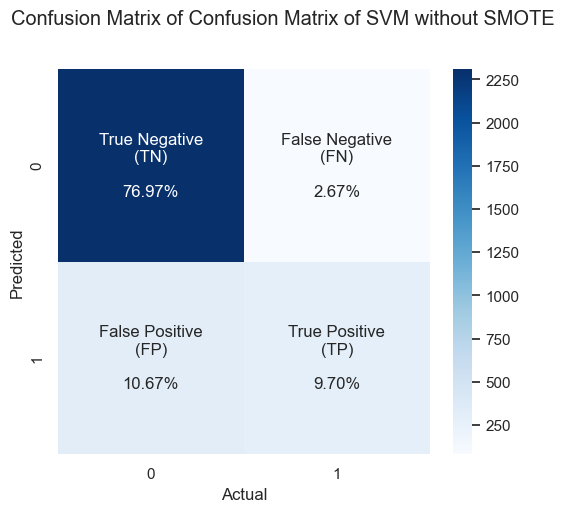

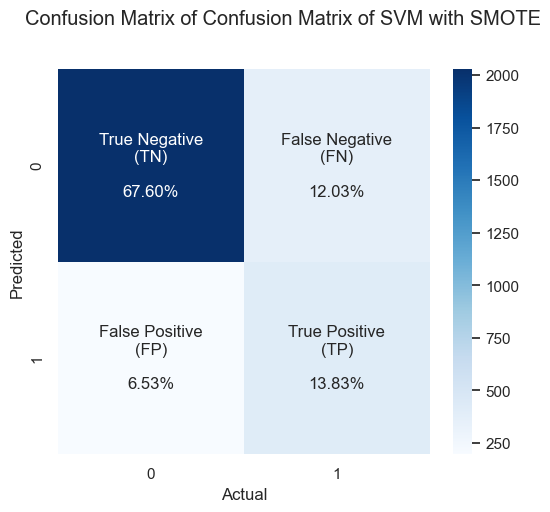

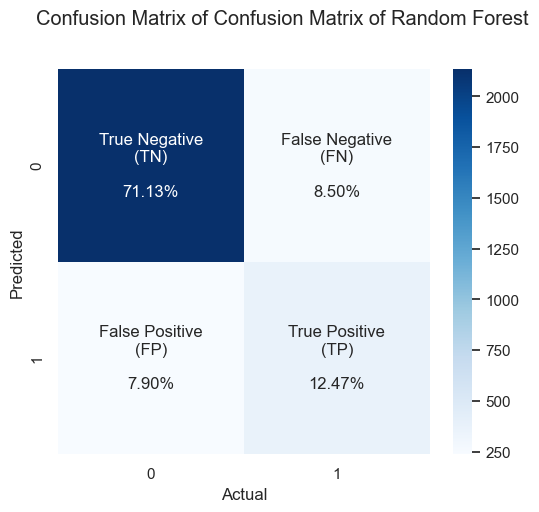

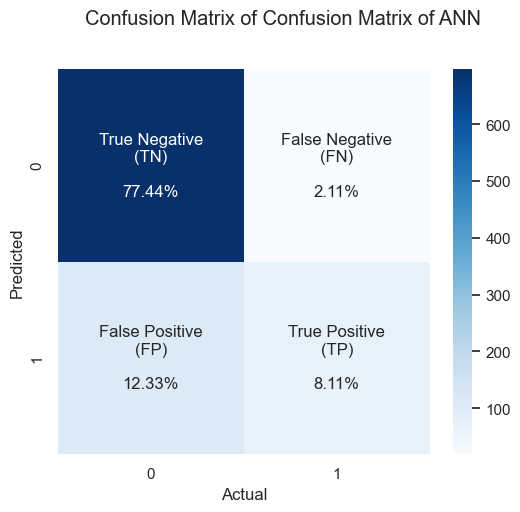

In [85]:
plot_cm(cm1,'Confusion Matrix of SVM without SMOTE')
plot_cm(cm2,'Confusion Matrix of SVM with SMOTE')
plot_cm(cm3,'Confusion Matrix of Random Forest')
plot_cm(cm_val,'Confusion Matrix of ANN')

In the context of customer churn analysis, the primary aim is to identify customers at risk of churning for effective retention strategies. The effectiveness of a model is determined by its ability to make accurate predictions. However, in this business context, the focus is on minimizing False Negatives (FN), where the model incorrectly predicts that a customer will not churn when they actually do. False negatives are crucial as they represent missed opportunities to intervene and retain customers.

From the above evaluated machine learning models,i found that the Neural Network Model performs with the best accuracy of around 86% ,also producing the least False negatives of around 2.11% indicating it predicts the best in case of a customer will churn and they actually do.